In [59]:
%pylab inline
from galaxy2galaxy import problems
from astropy.visualization import make_lupton_rgb
import tensorflow as tf
Modes = tf.estimator.ModeKeys

Populating the interactive namespace from numpy and matplotlib


In [60]:
# To list the problems currently available in G2G
problems.available()

['galsim_cosmos', 'galsim_cosmos32', 'hsc_problem', 'img2img_galsim_cosmos32']

In [63]:
# Let's create an instance of the hsc_problem
hsc = problems.problem('hsc_problem')

# And extract the training dataset, assuming g2g-datagen has already
# been run using:
# $ g2g-datagen --problem=hsc_problem --data-dir=data/hsc_problem --tmp_dir=hsc_tmp
dset = hsc.dataset(Modes.TRAIN, data_dir='data/hsc_problem')
dset = dset.batch(25)

In [65]:
# Build an iterator over this dataset, and extract a batch
it = dset.make_one_shot_iterator().get_next()

sess = tf.Session()
batch = sess.run(it)

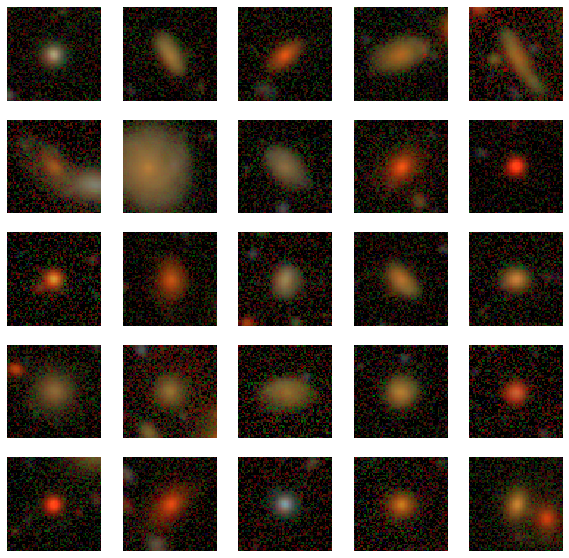

In [66]:
figure(figsize=(10,10))
for i in range(25):
    subplot(5,5,i+1)
    cutout = make_lupton_rgb(data['inputs'][i,:,:,2],
                         data['inputs'][i,:,:,1],
                         data['inputs'][i,:,:,0],
                         Q=15, stretch=0.5, minimum=0)
    imshow(cutout)
    axis('off')